<a href="https://colab.research.google.com/github/Harshjyot-Singh-Chawla/Health_insurance_cross_sell_prediction/blob/main/Copy_of_final_2_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [58]:
# Importing libraries for data handling
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering libraries
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Selection and Metrics libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

# **Import Data**

In [59]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
path= "/content/drive/MyDrive/Health_insurance_cross_sell_prediction-Harshjyot singh chawla/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"


In [61]:
# Loading of data
Health_df = pd.read_csv(path)

# **Data Summary**

In [62]:
# Showing first 5 rows of our dataframe
Health_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [63]:
# Showing last 5 rows of our dataframe
Health_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [64]:
# Finding the size of the dataset
Health_df.shape

(381109, 12)

In [65]:
# Check for null value and datatype of each column/Feature
Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB



**As per above observation we can say that : Dataset consists of 381109 rows & 12 columns. There are no Null or missing values present in the dataset.**

In [66]:
# Descriptive Statistical Summary of Numeric Variables
Health_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [67]:
# Checking unique values of each features
Health_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [68]:
# Checking for duplicates
Health_df.duplicated().sum()

0

**No duplicate value present in our dataset**

# **Exploratory Data Analysis**

**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations**

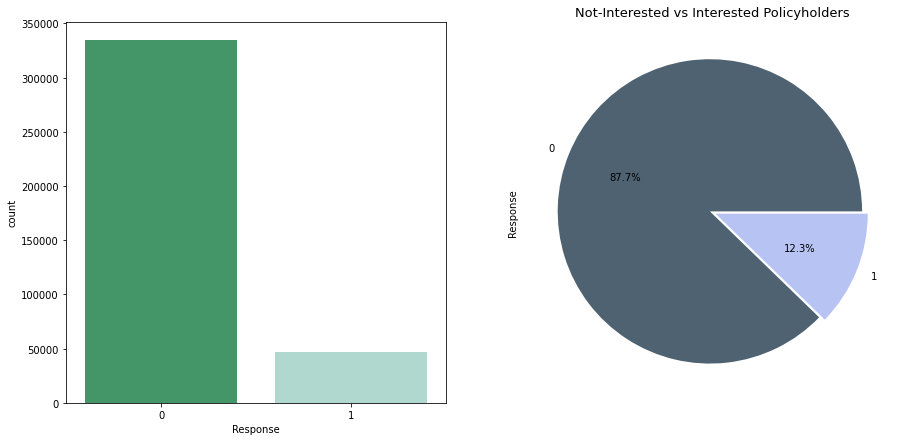

In [69]:
#Here, in our target variable(Response) 0 means the customer was not intrested in vechicle insurance and 1 means the customer was intrested in vehicle insurance. 

fig, axes = plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(Health_df['Response'], data=Health_df,ax = axes[0],palette = 'BuGn_r')
plt.title('Not-Interested vs Interested Policyholders', fontsize=13) #title for the countplot
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Health_df['Response'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[1],explode = [0.02,0.02],colors = colors, figsize=(15,7))
plt.show()

**The given dataset is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero** 


## **Gender**

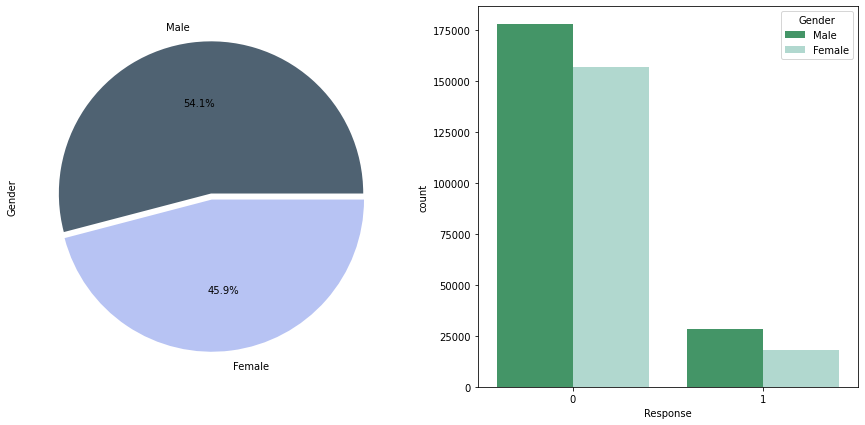

In [70]:
# # Analyzing Gender feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Health_df['Gender'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = Health_df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Gender',)

**Male category is somewhat more noteworthy than that of female and chances of purchasing the insurance is likewise minimal high**

## **Age**

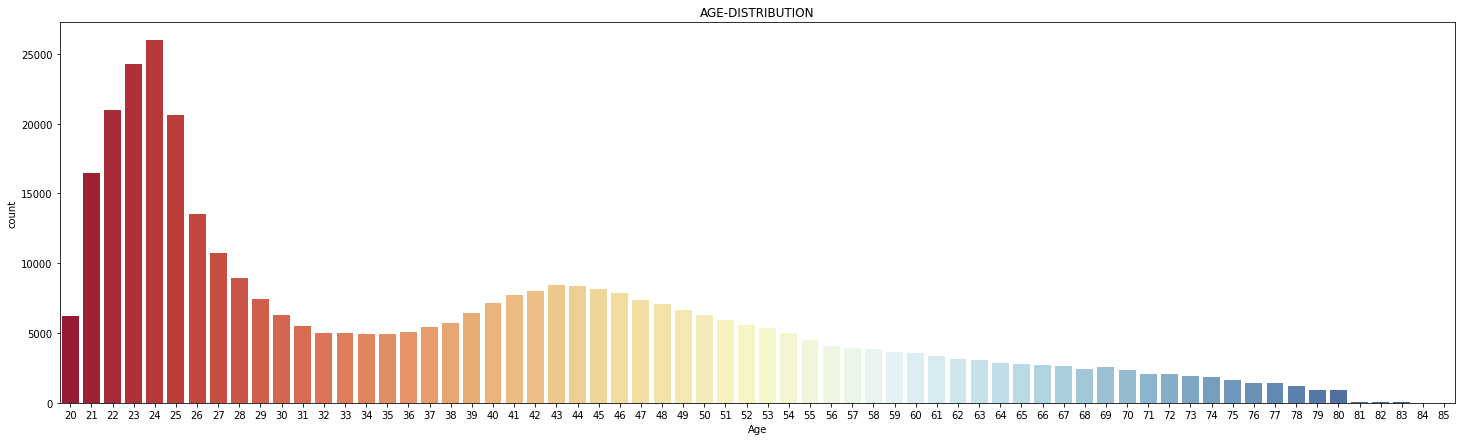

In [71]:
# Analysis of Age distribution
plt.figure(figsize=(25,7))
sns.countplot(Health_df['Age'],palette = 'RdYlBu')
plt.title("AGE-DISTRIBUTION")
plt.show()

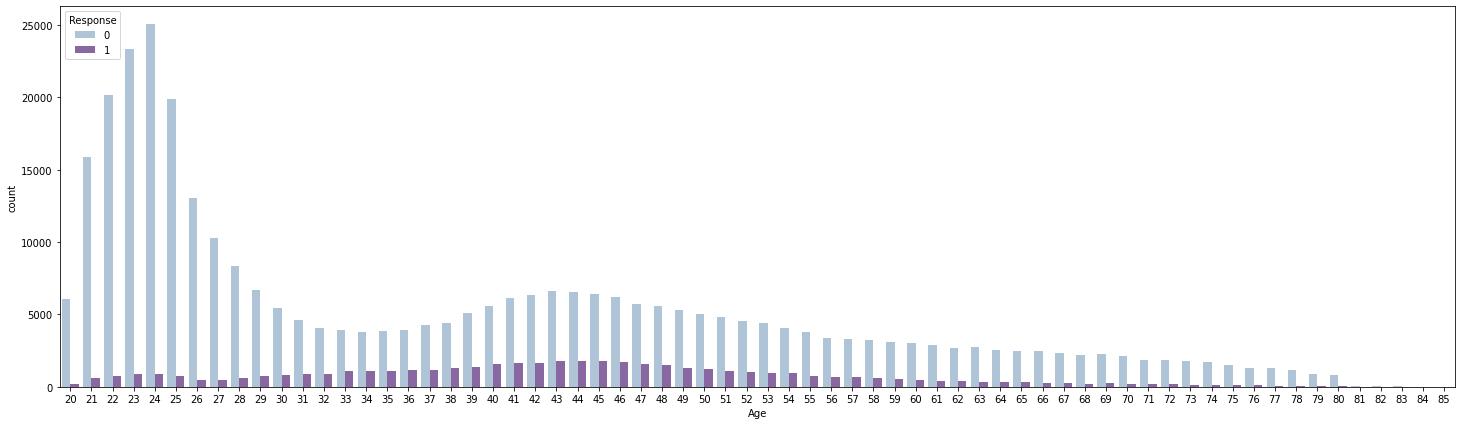

In [72]:
# Analysis of Age & Response
plt.figure(figsize=(25,7))
ax = sns.countplot(data = Health_df , x = 'Age', palette = 'BuPu', hue = 'Response',)




*   Youngsters under 30 are not intrigued by vehicle insurance. Reasons could be absence of involvement, less awareness about insurance and they may not have costly vehicles yet.

*    People of age range between 30-60 years are more likely to be interested and willing to purchase





## **Region code**

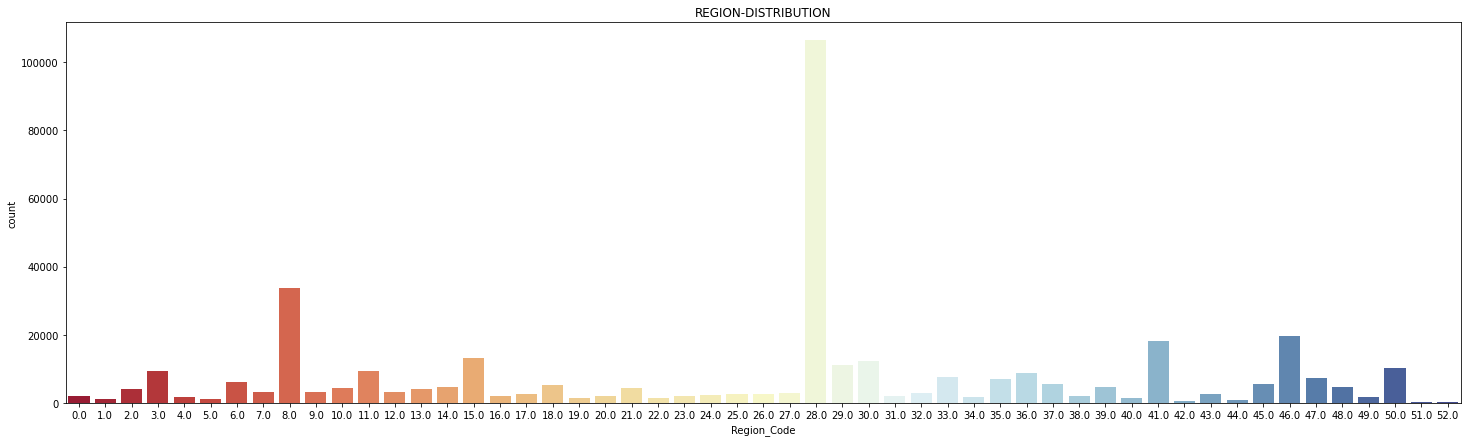

In [73]:
# Analyzing region feature 
plt.figure(figsize=(25,7))
sns.countplot(Health_df['Region_Code'],palette = 'RdYlBu')
plt.title("REGION-DISTRIBUTION")
plt.show()

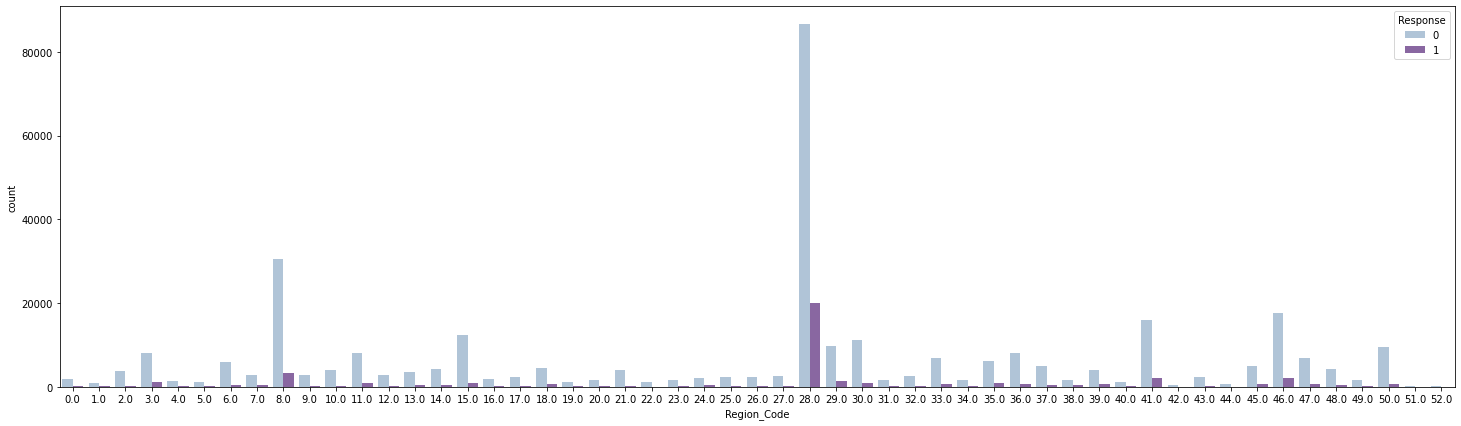

In [74]:
# Analyzing region feature and it's effect on response feature
plt.figure(figsize=(25,7))
ax = sns.countplot(data = Health_df , x = 'Region_Code', palette = 'BuPu', hue = 'Response',)

**Area code 28 has the most health insurance clients and region code 51 has the fewest**

## **Driving_License**

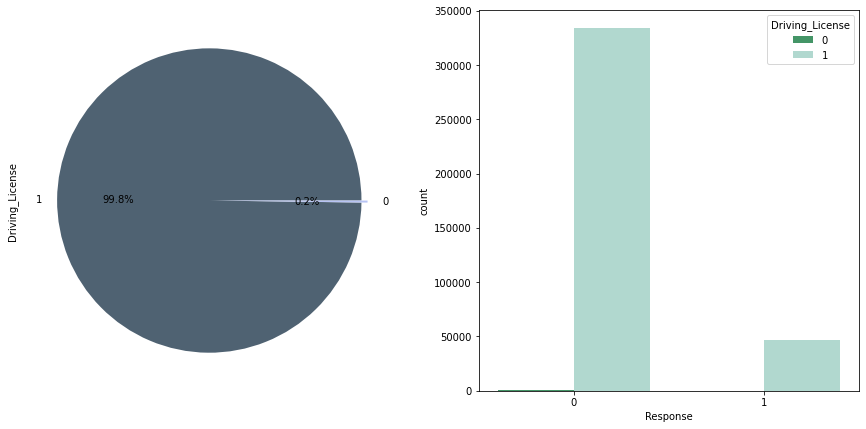

In [75]:
# Analyzing Driving_License feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3']
Health_df['Driving_License'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = Health_df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Driving_License',)


*  **We can see that if there is a license holder than it will be more likely to buy an insurance.**
*  **Also there is very less count of People who donot have driving license.**



## **Previously_Insured**

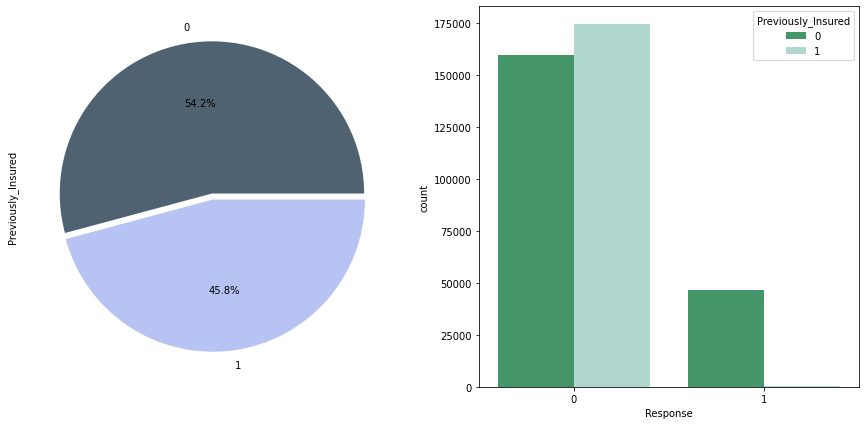

In [76]:
# Analyzing Previously_Insured feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Health_df['Previously_Insured'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = Health_df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Previously_Insured',)

**More than 50% of people doesn't have insurance.**

## **Vehicle Age**

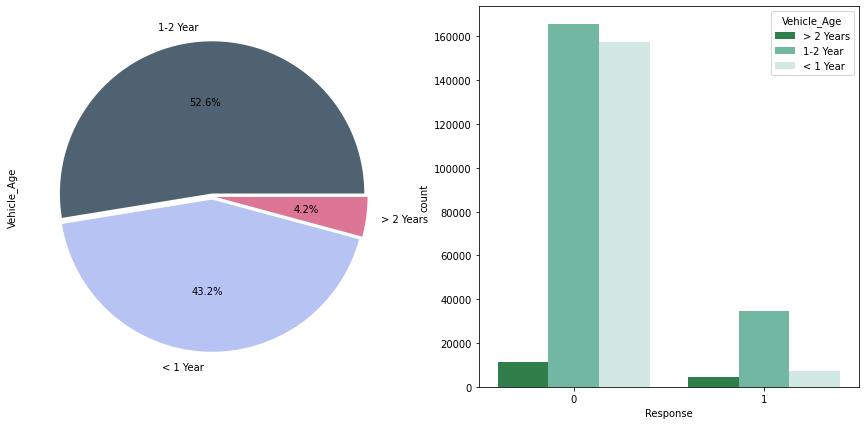

In [77]:
# Analyzing Vehicle Age feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Health_df['Vehicle_Age'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = Health_df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Vehicle_Age',)



*   **Consumers with 1-2-year-old vehicles are more interested as compared to others.**
*   **Consumers with less than 1 year old Vehicles have very less chance of buying Insurance**



## **Vehicle_Damage**

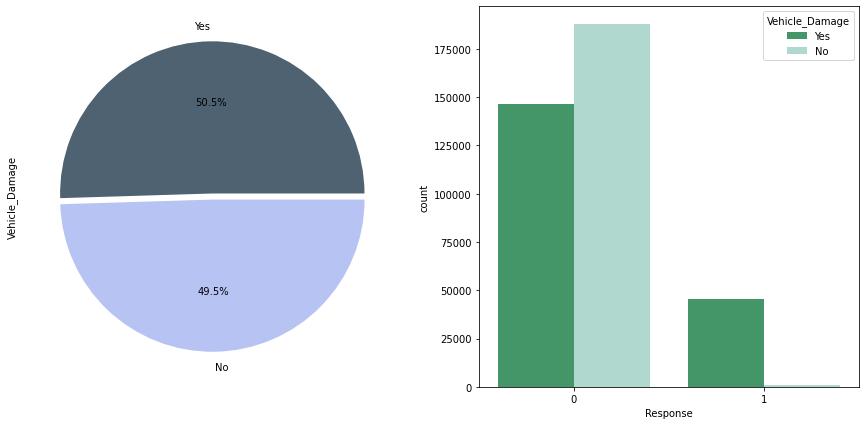

In [78]:
# Analyzing Vehicle_Damage feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Health_df['Vehicle_Damage'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = Health_df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Vehicle_Damage',)

**Half of all health insurance customers have had their car destroyed, while the other half have not**

## **Annual_Premium**

Text(0.5, 1.0, 'Annual premium vs response')

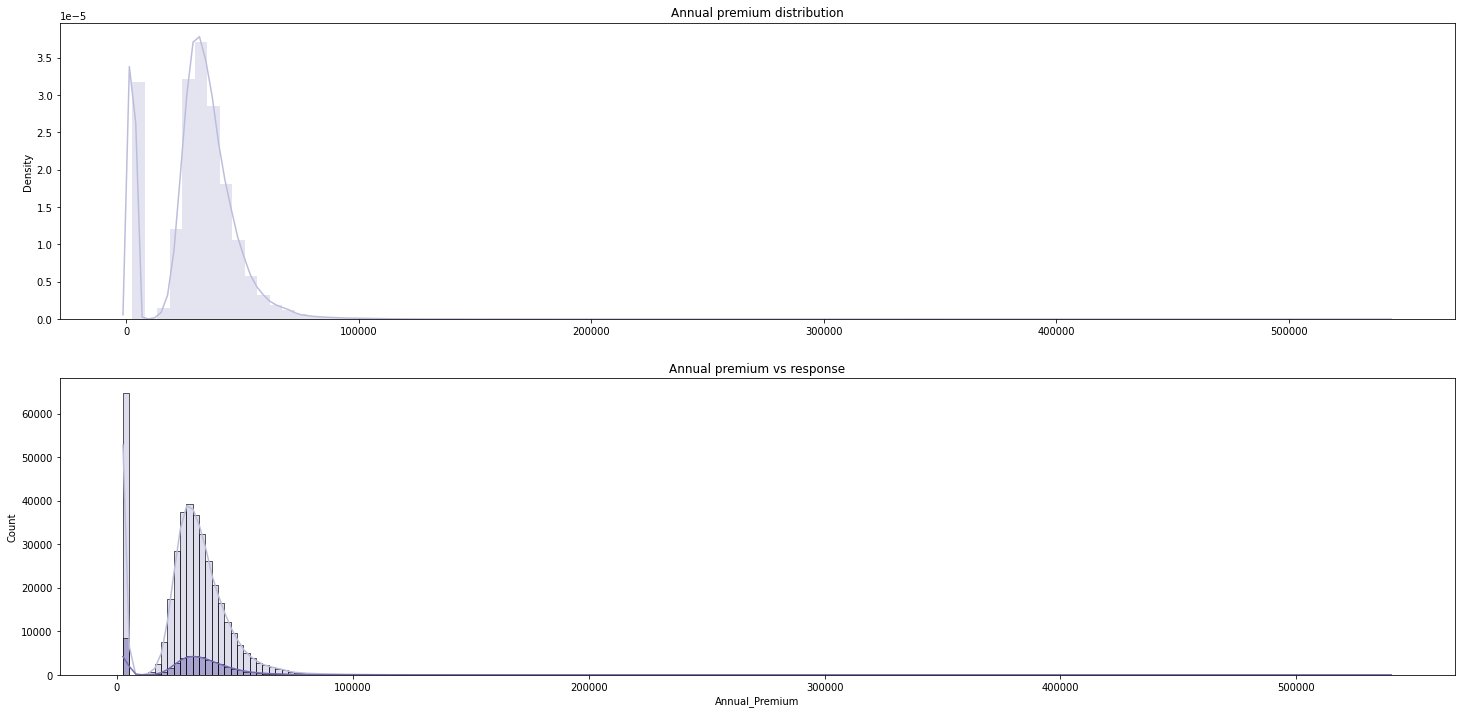

In [79]:
# Analysis on Annual distribution along with response relation with annual premium

# defining figures
fig, axes = plt.subplots(2,1, figsize =( 25,12))

# plotting distplot for annual premium
sns.distplot( x= Health_df['Annual_Premium'], ax = axes[0],color= "#bcbddc",bins = 100)
axes[0].set_title('Annual premium distribution')

# plotting hist plot and response distribution 
sns.histplot( x= Health_df['Annual_Premium'], ax = axes[1], bins = 200,color="#bcbddc", kde = True)
sns.histplot( x= Health_df['Annual_Premium'][Health_df['Response'] == 1], ax = axes[1], bins = 200, color = '#756bb1', kde = True)
axes[1].set_title('Annual premium vs response')

**Its observed from the distribution plot, that the annual premimum feature is right skewed**

## **Vintage**

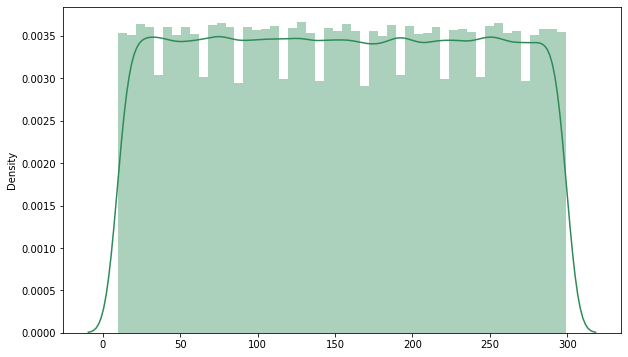

In [80]:
# Plotting the distplot for vintange 
fig= plt.subplots(figsize = (10,6))
sns.distplot( x= Health_df['Vintage'], color= '#2E8B57')

Text(0.5, 1.0, ' Vintage vs response')

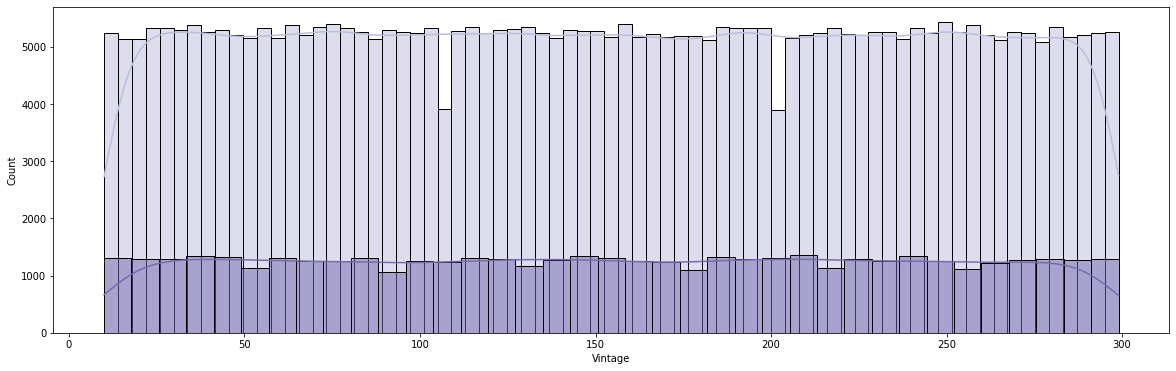

In [81]:
# Analyzing Vintage feature and it's effect on response feature
fig= plt.subplots(figsize = (20,6))
sns.histplot( x= Health_df['Vintage'],color="#bcbddc", kde = True)
sns.histplot( x= Health_df['Vintage'][Health_df['Response'] == 1], color = '#756bb1', kde = True)
axes[1].set_title(' Vintage vs response')


# **Multivariate Analysis** 

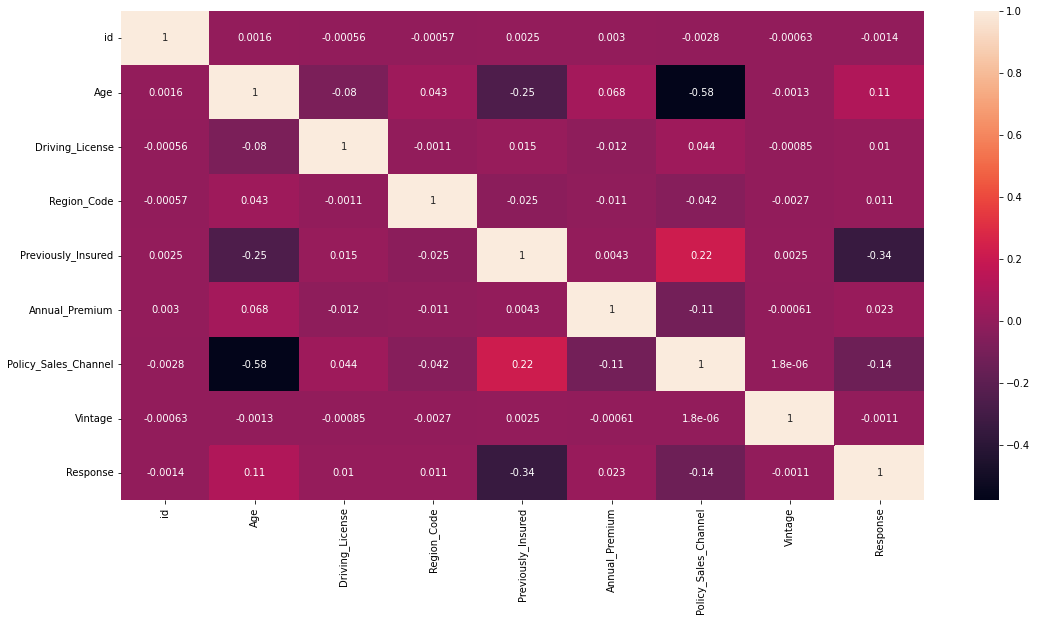

In [82]:
# Plotting heatmap to find correlation
plt.figure(figsize=(18,9))
ax = sns.heatmap(Health_df.corr(),annot=True)

**There is no such strong correlation among features as we can see from the above heatmap.**

# **Checking for Outliers**

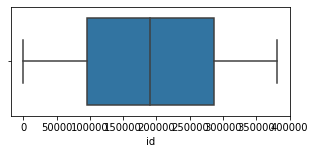

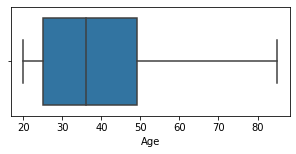

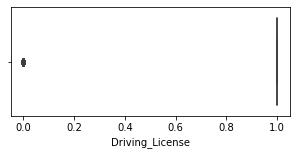

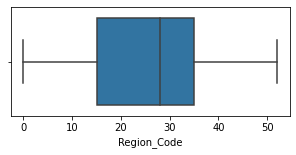

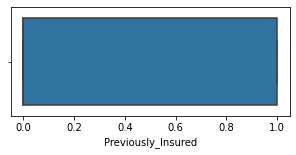

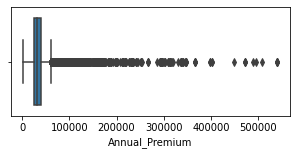

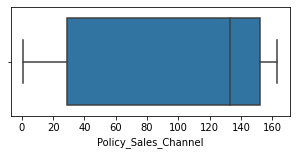

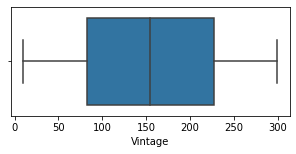

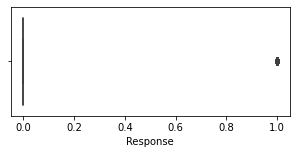

In [83]:
#Checking for outliers 
int_df = Health_df[list(Health_df.describe())]

for column in int_df:
    plt.figure(figsize=( 5,2))
    sns.boxplot(data=int_df,x=column)
    

**Annual_premium feature contains outliers so we will tranfrom Annual_premium to normal distribution**


In [84]:
features = Health_df[['Annual_Premium']]

In [85]:
#instatiate 
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True,) 

#Fitting data to the powertransformer
skl_yeojohnson = pt.fit(features)

#Lets get the Lambdas that were found
print (skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data 
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe 
Health_df['Annual_Premium'] = pd.DataFrame(data=skl_yeojohnson, columns=['Annual_Premium'])

Health_df['Annual_Premium']

[0.76692882]


0         0.612207
1         0.243028
2         0.498644
3        -0.030214
4        -0.094107
            ...   
381104    0.057079
381105    0.589296
381106    0.328903
381107    0.827191
381108    0.681065
Name: Annual_Premium, Length: 381109, dtype: float64

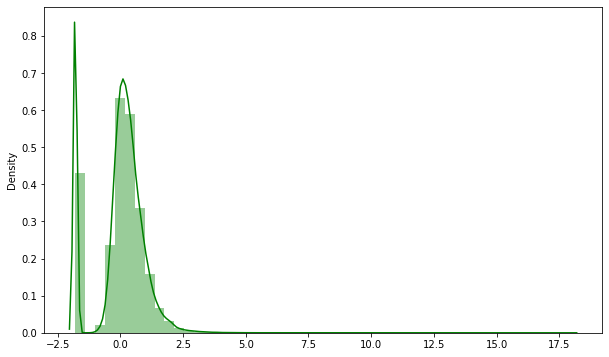

In [86]:
fig= plt.subplots(figsize = (10,6))
sns.distplot( x= Health_df['Annual_Premium'], color= 'g')

**We will drop id column as it has not attribute**

In [87]:
# Droping id column
Health_df.drop("id",inplace=True,axis=1)

# **Encoding** 

In [88]:
#encoding numerical columns to categorcial 
#we will use both label as well as one hot encoding for transformation of data type
le = LabelEncoder()
ohe = OneHotEncoder()

#mapping
Health_df["Vehicle_Age"]=Health_df["Vehicle_Age"].map({"> 2 Years":2,"1-2 Year":1,"< 1 Year":0})


#categorical to numerical
Health_df['Gender'] = ohe.fit_transform(Health_df[["Gender"]]).toarray()
Health_df['Vehicle_Age'] = le.fit_transform(Health_df[['Vehicle_Age']])
Health_df['Vehicle_Damage'] = le.fit_transform(Health_df[['Vehicle_Damage']])

In [89]:
# Showing first 5 rows of our dataframe
Health_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.0,44,1,28.0,0,2,1,0.612207,26.0,217,1
1,0.0,76,1,3.0,0,1,0,0.243028,26.0,183,0
2,0.0,47,1,28.0,0,2,1,0.498644,26.0,27,1
3,0.0,21,1,11.0,1,0,0,-0.030214,152.0,203,0
4,1.0,29,1,41.0,1,0,0,-0.094107,152.0,39,0


In [90]:
# Check for null value and datatype of each column/Feature
Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  float64
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 32.0 MB


#**Feature selection**

In [91]:
# Importing iportant libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to Calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
    
  

In [92]:
# VIF values for independent features
calc_vif(Health_df[[i for i in Health_df.describe().columns if i not in ['Response']]])

,variables,VIF
0,Gender,1.900420
1,Age,18.381724
2,Driving_License,40.268862
3,Region_Code,4.957160
4,Previously_Insured,5.724299
5,Vehicle_Age,6.034246
6,Vehicle_Damage,6.351624
7,Annual_Premium,1.014392
8,Policy_Sales_Channel,8.107759
9,Vintage,4.373705


In [93]:
# Droping Driving_License variable
Health_df= Health_df.drop(["Driving_License"],axis=1)

In [94]:
# VIF values for independent features
calc_vif(Health_df[[i for i in Health_df.describe().columns if i not in ['Response']]])

,variables,VIF
0,Gender,1.847842
1,Age,13.471196
2,Region_Code,4.558850
3,Previously_Insured,4.620188
4,Vehicle_Age,6.023186
5,Vehicle_Damage,5.186692
6,Annual_Premium,1.013756
7,Policy_Sales_Channel,5.217964
8,Vintage,4.066432


**After dropping Driving_License we got reasonable VIF scores**

# **Handling Imbalance**

In [95]:
X=Health_df.drop(['Response'],axis=1) #contain all  independent variable
y=Health_df['Response']           #dependent variable


In [96]:
# Importing libraries for resampling
# Handling imbalance data
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(X, y)


print('Original dataset shape', len(Health_df))
print('Resampled dataset shape', len(y))

Original dataset shape 381109
Resampled dataset shape 668798


In [97]:
X.shape

(668798, 9)

# **Test-Train Split**

In [98]:
# Splitting the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20,random_state = 10)

In [99]:
# Checking balanced data for train dataset
y_train.value_counts()

1    267521
0    267517
Name: Response, dtype: int64

In [100]:
# Checking balanced data for test dataset
y_test.value_counts()

0    66882
1    66878
Name: Response, dtype: int64

# **Logistic Regression**

In [101]:
# Model of logistic regression
LOG_RE=LogisticRegression()
LOG_RE=LOG_RE.fit(X_train,y_train)
LOG_RE_pred=LOG_RE.predict(X_test)
LOG_RE_probability =LOG_RE.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_logreg = accuracy_score(y_test,LOG_RE_pred)
recall_logreg = recall_score(y_test,LOG_RE_pred)
prec_logreg = precision_score(y_test,LOG_RE_pred)
f1score_logreg=f1_score(y_test,LOG_RE_pred)

#print accuracy ,classification report and confusion matrix  values of model.
print("Accuracy : ", accuracy_score(y_test,LOG_RE_pred)*100)
print(classification_report(y_test,LOG_RE_pred))

matrix = confusion_matrix(y_test,LOG_RE_pred)
print('Confusion matrix : \n',matrix)


Accuracy :  77.74745813397129
              precision    recall  f1-score   support

           0       0.94      0.59      0.73     66882
           1       0.70      0.96      0.81     66878

    accuracy                           0.78    133760
   macro avg       0.82      0.78      0.77    133760
weighted avg       0.82      0.78      0.77    133760

Confusion matrix : 
 [[39538 27344]
 [ 2421 64457]]


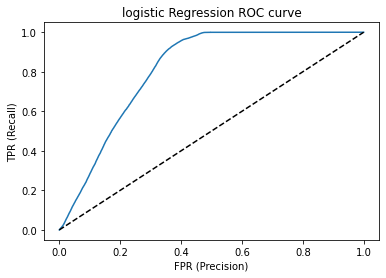

In [102]:
# Importing roc curve
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,LOG_RE_probability)

# Evaluation metrics
plt.title('logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

# Performance metrics
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[39538 27344]
 [ 2421 64457]]


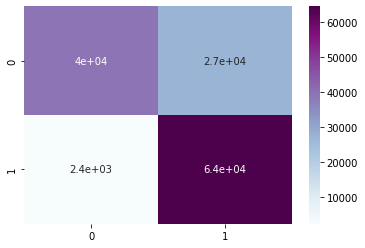

In [103]:
# Confusion matrix 
cm=confusion_matrix(y_test,LOG_RE_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **Decision tree**

In [104]:
# Creating instance for our model, fiting and predicitng
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_probability =dtree.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_dtree = accuracy_score(y_test,dtree_pred)
recall_dtree = recall_score(y_test,dtree_pred)
prec_dtree = precision_score(y_test,dtree_pred)
f1score_dtree=f1_score(y_test,dtree_pred)


#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, dtree_pred)*100)
print(classification_report(y_test, dtree_pred))

print('Confusion matrix : \n',confusion_matrix(y_test,dtree_pred, labels=[1,0]))


87.26076555023924
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     66882
           1       0.86      0.88      0.87     66878

    accuracy                           0.87    133760
   macro avg       0.87      0.87      0.87    133760
weighted avg       0.87      0.87      0.87    133760

Confusion matrix : 
 [[59089  7789]
 [ 9251 57631]]


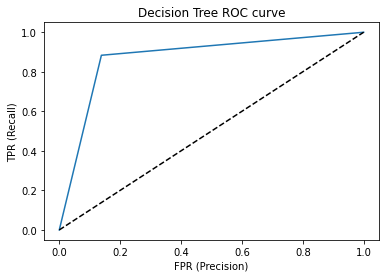

In [105]:
# Analyze Performance 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,dtree_probability)

plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[57631  9251]
 [ 7789 59089]]


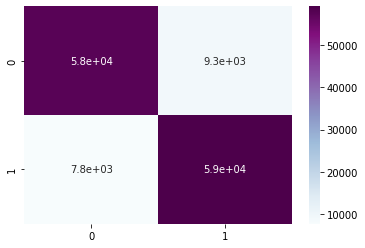

In [106]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,dtree_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **Random Forest classifier**

In [107]:
# Creating instance for our model, fiting and predicitng
rf_tree = RandomForestClassifier()
rf_tree.fit(X_train, y_train)
rf_tree_pred = rf_tree.predict(X_test)
rf_tree_probability = rf_tree.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_rf= accuracy_score(y_test,rf_tree_pred)
recall_rf = recall_score(y_test,rf_tree_pred)
prec_rf= precision_score(y_test,rf_tree_pred)
f1score_rf=f1_score(y_test,rf_tree_pred)

#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, rf_tree_pred)*100)
print(classification_report(y_test, rf_tree_pred))
print("Confusion matrix\n", confusion_matrix(y_test, rf_tree_pred))

89.68376196172248
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     66882
           1       0.88      0.92      0.90     66878

    accuracy                           0.90    133760
   macro avg       0.90      0.90      0.90    133760
weighted avg       0.90      0.90      0.90    133760

Confusion matrix
 [[58556  8326]
 [ 5473 61405]]


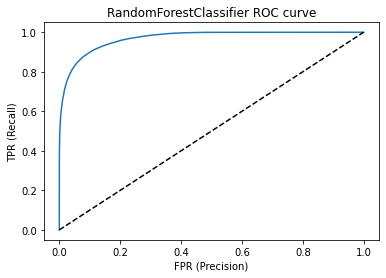

In [108]:
# Analyze Performance 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,rf_tree_probability )

plt.title('RandomForestClassifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[58556  8326]
 [ 5473 61405]]


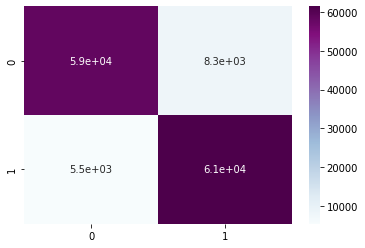

In [109]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,rf_tree_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **XGB Classifier**

In [110]:
# Importing of XGBClassifier
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_model_probability = xgb_model.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_xgb = accuracy_score(y_test,xgb_pred)
recall_xgb = recall_score(y_test,xgb_pred)
prec_xgb = precision_score(y_test,xgb_pred)
f1score_xgb=f1_score(y_test,xgb_pred)

#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, xgb_pred)*100)
print(classification_report(y_test, xgb_pred))
print("Confusion matrix\n", confusion_matrix(y_test, xgb_pred))

84.14249401913875
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     66882
           1       0.80      0.91      0.85     66878

    accuracy                           0.84    133760
   macro avg       0.85      0.84      0.84    133760
weighted avg       0.85      0.84      0.84    133760

Confusion matrix
 [[51892 14990]
 [ 6221 60657]]


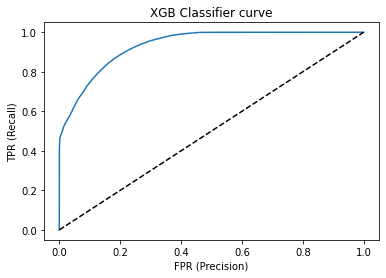

In [111]:
# performance and evaluation
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,xgb_model_probability)

plt.title('XGB Classifier curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[51892 14990]
 [ 6221 60657]]


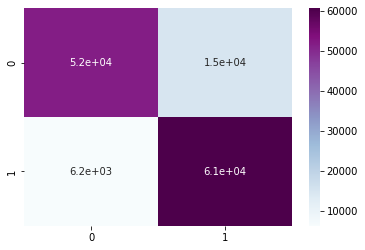

In [112]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,xgb_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

#**Comparing Models**

In [113]:
## Comparing the performance of the models
ind=['Logistic regression','Decision Tree','Randomforest','XGBClassifier']
df={"Accuracy":[accu_logreg,accu_dtree,accu_rf,accu_xgb],"Recall":[recall_logreg,recall_dtree,recall_rf,recall_xgb],"Precision":[prec_logreg,prec_dtree,prec_rf,prec_xgb],'f1_score':[f1score_logreg,f1score_dtree,f1score_rf,f1score_xgb]}
result=pd.DataFrame(data=df,index=ind)
result

,Accuracy,Recall,Precision,f1_score
Logistic regression,0.777475,0.963800,0.702138,0.812420
Decision Tree,0.872608,0.883534,0.864633,0.873981
Randomforest,0.896838,0.918164,0.880598,0.898989
XGBClassifier,0.841425,0.906980,0.801843,0.851177
